<a href="https://colab.research.google.com/github/seoulartgirl/GithubPortfolio/blob/main/%E1%84%83%E1%85%B5%E1%86%B8%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC08_CNN_03_%E1%84%89%E1%85%A9%E1%84%80%E1%85%B2%E1%84%86%E1%85%A9%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%92%E1%85%AE%E1%86%AB%E1%84%85%E1%85%A7%E1%86%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 소규모 데이터셋에서 컨브넷(CNN) 훈련

### 예제. 캐글의 dogs-vs-cats 데이터

- 캐글에서 2013년 후반 컴퓨터비전 경연대회를 위해 만들어진 데이터셋
- https://www.kaggle.com/competitions/dogs-vs-cats/
- 812MB

### 1. 데이터 준비

#### Kaggle API를 이용하여 파일 다운로드

**Kaggle API 키 생성 및 저장**

1. Kaggle 사이트 로그인
2. Account 페이지로 이동
3. Setting 메뉴 선택
4. API 섹션에서 [Create New Token]선택하여 토큰 파일 kaggle.json 생성
5. kaggle.json 파일을 사용자계정폴더 아래 /.kaggle/ 폴더를 생성하여 저장
  

**다음 명령어로 데이터 파일 다운로드**

#### 압축파일 풀기

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"crytsalmoon","key":"6671b78536c71d1fa285d18c6ebb46c5"}'}

In [ ]:
!mkdir ~/.kaggle #make directory
!cp kaggle.json ~/.kaggle/ #copy 해서 폴더 저장
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle #폴더 안에 보여줌

mkdir: cannot create directory ‘/root/.kaggle’: File exists
kaggle.json


In [ ]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


#### 이미지를 훈련, 검증, 테스트 디렉토리로 복사하기
- train 폴더에 cat, dog 폴더를 생성하고 각각 1000개씩 이미지 저장
- validation 폴더에 cat, dog 폴더를 생성하고 각각 500개씩 이미지 저장
- test 폴더에 cat, dog 폴더를 생성하고 각각 1000개씩 이미지 저장

In [ ]:
import zipfile

with zipfile.ZipFile(r'dogs-vs-cats.zip', 'r') as zip_ref:
  zip_ref.extractall('data/dogs-vs-cats')

In [ ]:
with zipfile.ZipFile(r'data/dogs-vs-cats/train.zip', 'r') as zip_ref:
  zip_ref.extractall('data/dogs-vs-cats')

In [ ]:
!unzip -qq dogs-vs-cats.zip

replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip -qq train.zip

replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

- Colab 노트북 폴더에 데이터 저장
    - cat/train
    - cat/test
    - cat/validation
    - dog/train
    - dog/test
    - dog/validation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, shutil, pathlib

origin_dir = pathlib.Path('/content/train')
new_base_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/cats_vs_dogs_small')

def make_subset(subset_name, start_index, end_index):
    for category in ('cat', 'dog'):
        dir = new_base_dir / subset_name / category
        if not os.path.exists(dir):
            os.makedirs(dir)
        fnames = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=origin_dir/fname, dst=dir/fname)

In [ ]:
make_subset('train', start_index=0, end_index=1000)
make_subset('validation', start_index=1000, end_index=1500)
make_subset('test', start_index=1500, end_index=2500)

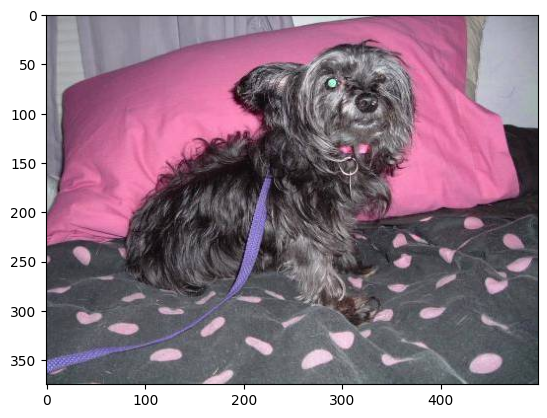

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread(new_base_dir / 'train/dog/dog.0.jpg')
plt.imshow(img)
plt.show()

### 2. 모델 만들기

In [ ]:
import tensorflow as tf
import tensorflow
from tensorflow import keras
from keras import layers

#### 모델 build

- 일반적인 모델 구조 사용
- 180x180 크기에서 7x7 크기의 특성 맵으로 줄임

In [ ]:
inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

#### 모델 컴파일

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['accuracy'])

### 3. 데이터 전처리

- 이미지 파일 읽기
- JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩
- 부동 소수점 타입의 텐서로 변환
- 동일한 크기의 이미지로 변경(180x180)
- 배치로 묶기(하나의 배치를 32개 이미지로 구성)

In [ ]:
from keras.utils import image_dataset_from_directory

#### `image_dataset_from_directory()` 함수를 사용하여 이미지 읽기

- 자동으로 디스크에 있는 이미지 파일을 자동으로 전처리된 텐서의 배치로 변환하는 데이터 파이프라인을 빠르게 구성
- image_dataset_from_directory() 수행 내용
    - directory의 서브디렉터리를 찾음
        - 각 서브디렉터리에는 한 클래스에 해당하는 이미지가 담겨있다고 가정
    - 각 서브디렉터리에 있는 이미지 파일을 인덱싱
    - 파일을 읽고, 순서를 섞고, 텐서로 디코딩하고, 동일 크기로 변경하고, 배치로 묶어 준 td.data.Dataset 객체를 만들어 반환
- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [ ]:
train_dir = os.path.join(new_base_dir, 'train')
validation_dir = os.path.join(new_base_dir, 'validation')
test_dir = os.path.join(new_base_dir, 'test')

train_ds = image_dataset_from_directory(train_dir, image_size=(180,180), batch_size=32)
validation_ds = image_dataset_from_directory(validation_dir, image_size=(180,180), batch_size=32)
test_ds = image_dataset_from_directory(test_dir, image_size=(180,180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

#### `Dataset`이 반환하는 데이터와 레이블 크기 확인하기

In [ ]:
for data_batch, labels_batch in train_ds:
    print(f'데이터 배치 크기 : {data_batch.shape}')
    print(f'레이블 배치 크기 : {labels_batch.shape}')
    break

데이터 배치 크기 : (32, 180, 180, 3)
레이블 배치 크기 : (32,)


#### `Dataset`을 사용해 모델 훈련하기

In [ ]:
base_model_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/model'
model_name = 'cat_dog_CNN1.keras'
callbacks = [keras.callbacks.ModelCheckpoint(filepath=base_model_path + model_name,
                                             save_best_only=True,
                                             monitor='val_loss')]

history = model.fit(train_ds, epochs=30, validation_data=validation_ds,
                    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 208s 3s/step - loss: 0.3772 - accuracy: 0.8275 - val_loss: 0.6783 - val_accuracy: 0.7190
Epoch 2/30
63/63 [==============================] - 208s 3s/step - loss: 0.3374 - accuracy: 0.8505 - val_loss: 0.7681 - val_accuracy: 0.6870
Epoch 3/30
63/63 [==============================] - 203s 3s/step - loss: 0.2808 - accuracy: 0.8845 - val_loss: 0.8077 - val_accuracy: 0.7110
Epoch 4/30
63/63 [==============================] - 206s 3s/step - loss: 0.2319 - accuracy: 0.9070 - val_loss: 0.8307 - val_accuracy: 0.6810
Epoch 5/30
63/63 [==============================] - 216s 3s/step - loss: 0.1903 - accuracy: 0.9260 - val_loss: 0.9070 - val_accuracy: 0.7210
Epoch 6/30
63/63 [==============================] - 216s 3s/step - loss: 0.1424 - accuracy: 0.9465 - val_loss: 0.8627 - val_accuracy: 0.7420
Epoch 7/30
63/63 [==============================] - 202s 3s/step - loss: 0.1208 - accuracy: 0.9540 - val_loss: 1.0841 - val_accuracy: 0.7240
Epoch 8/30
63

#### 훈련 정확도와 손실 그래프 그리기

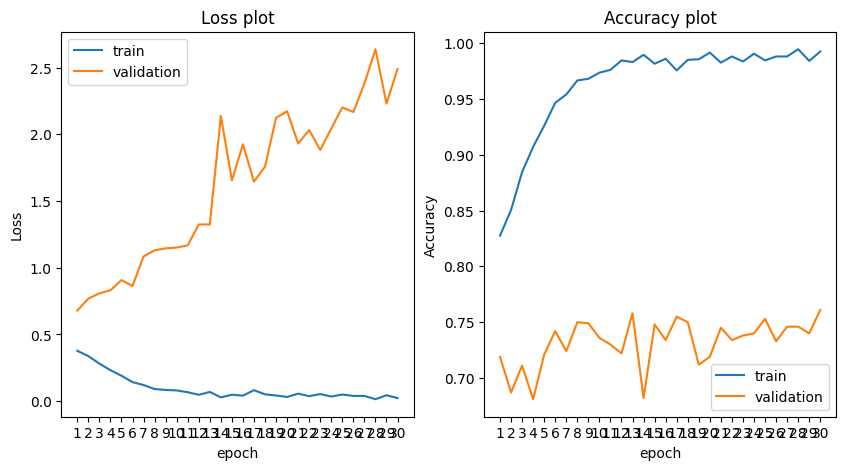

In [ ]:
def draw_metric_plot2(history):
    loss = ['loss', 'val_loss']
    acc = ['accuracy', 'val_accuracy']
    title = ['Loss', 'Accuracy']
    plt.figure(figsize=(10,5))
    for i, item in enumerate([loss, acc]):
        n = len(history.history[item[0]])
        plt.subplot(1,2,i+1)
        plt.plot(history.history[item[0]], label='train')
        plt.plot(history.history[item[1]], label='validation')
        plt.xlabel('epoch')
        plt.ylabel(title[i])
        plt.xticks(range(n), range(1, n+1))
        plt.title(title[i] + ' plot')
        plt.legend()
    plt.show()
draw_metric_plot2(history)

#### 테스트 세트에서 모델 평가하기

In [ ]:
best_model = keras.models.load_model(base_model_path + model_name)
test_loss, test_acc = best_model.evaluate(test_ds)
print(f'test_loss = {test_loss:.4f}, test_accuracy = {test_acc:.4f}')

63/63 [==============================] - 69s 1s/step - loss: 0.7294 - accuracy: 0.7070
test_loss = 0.7294, test_accuracy = 0.7070


- 테스트 데이터에 대한 정확도 69.4%
- 훈련데이터 샘플 수 2000개로 적음 => 과적합 발생
    - 보통 작은 샘플 : 수백개 ~ 수만개
- 과적합 방지: 드롭아웃, 규제, 데이터 추가

### 4. 데이터 증식(augmentation) 사용하기

- 데이터 증식은 기존 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법
- 여러 가지 랜덤한 변환을 적용하여 샘플을 늘림
- 훈련할 때 모델이 정확히 같은 데이터를 두 번 만나지 않도록 하는 것이 목표
- 케라스에서는 모델 시작 부분에 여러 개의 **데이터 증식 층(data augmentation layer)** 을 추가할 수 있음

#### 컨브넷에 추가할 데이터 증식 단계 정의하기

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ])

#### 랜덤하게 증식된 훈련 이미지 출력하기

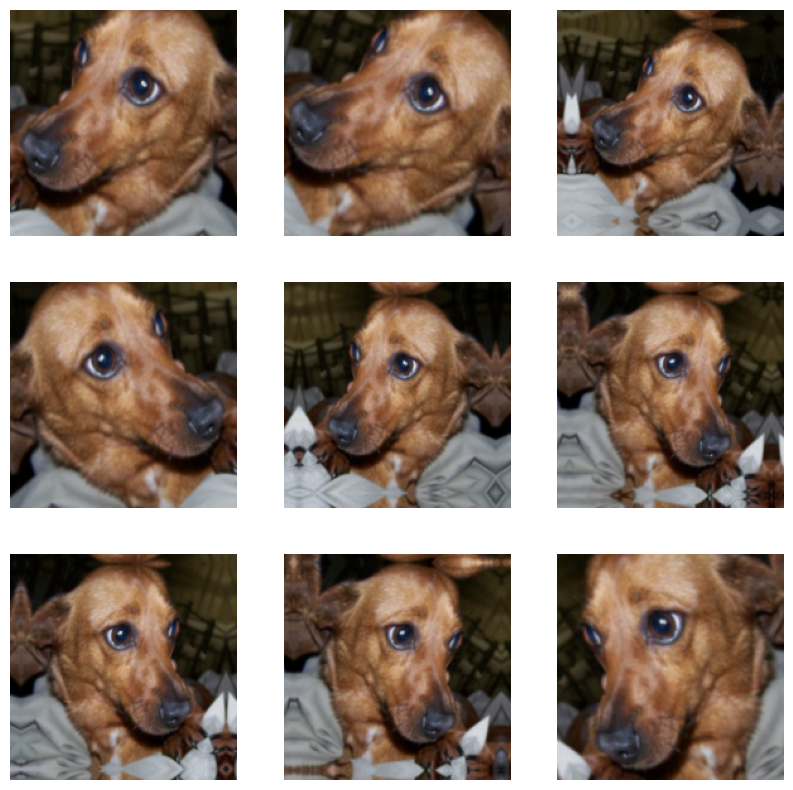

In [ ]:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
    for i in range(9):
        aug_images = data_augmentation(images)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(aug_images[0].numpy().astype('uint8')) #8비트짜리 int
        plt.axis('off')
    plt.show()

#### 이미지 증식과 드롭아웃을 포함한 컨브넷 만들기

In [ ]:
inputs2 = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs2)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs2 = layers.Dense(1, activation='sigmoid')(x)
model2 = keras.Model(inputs2, outputs2)

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

#### 컨브넷 훈련하기

In [ ]:
base_model_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/model'
model_name = 'cat_dog_CNN_aug.keras'

call_backs2 = [keras.callbacks.ModelCheckpoint(filepath=base_model_path + model_name,
                                              save_best_only=True,
                                              monitor='val_loss')]

history2 = model2.fit(train_ds, epochs=30, validation_data=validation_ds,
                      callbacks=call_backs2)

Epoch 1/30
63/63 [==============================] - 311s 5s/step - loss: 0.7445 - accuracy: 0.5200 - val_loss: 0.6918 - val_accuracy: 0.5010
Epoch 2/30
63/63 [==============================] - 217s 3s/step - loss: 0.6941 - accuracy: 0.5410 - val_loss: 0.6902 - val_accuracy: 0.5060
Epoch 3/30
63/63 [==============================] - 230s 4s/step - loss: 0.6902 - accuracy: 0.5325 - val_loss: 0.6857 - val_accuracy: 0.5110
Epoch 4/30
63/63 [==============================] - 215s 3s/step - loss: 0.6775 - accuracy: 0.5755 - val_loss: 0.6783 - val_accuracy: 0.5680
Epoch 5/30
63/63 [==============================] - 216s 3s/step - loss: 0.6595 - accuracy: 0.6200 - val_loss: 0.6629 - val_accuracy: 0.5900
Epoch 6/30
63/63 [==============================] - 231s 4s/step - loss: 0.6486 - accuracy: 0.6265 - val_loss: 1.0410 - val_accuracy: 0.5210
Epoch 7/30
63/63 [==============================] - 214s 3s/step - loss: 0.6504 - accuracy: 0.6470 - val_loss: 0.6024 - val_accuracy: 0.6610
Epoch 8/30
63

#### 테스트 세트에서 모델 훈련하기

In [ ]:
base_model_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/model'
model_name = 'cat_dog_CNN_aug.keras'

best_model2 = keras.models.load_model(base_model_path + model_name)
test_loss, test_acc = best_model2.evaluate(test_ds)
print(f'test_loss = {test_loss:.4f}, test_accuracy = {test_acc:.4f}')

63/63 [==============================] - 60s 910ms/step - loss: 0.4662 - accuracy: 0.7965
test_loss = 0.4662, test_accuracy = 0.7965


모델평가 결과:
- 데이터 증강 없이: test_loss = 0.7294, test_accuracy = 0.7070
- 데이터 증강 후: test_loss = 0.4662, test_accuracy = 0.7965

=> 데이터 증강 후 정확도 개선됨

___